# Midterm file revamp
I'm cleaning up my MidtermPrep notebook, so this one only includes the static maps related to income. It does not include the parks dataset exploration nor does it include the folium interactive map.

**(geo)dataframes:** (so I can keep track of them all)
- tracts: initial geojson from **[LA County Open Source GIS page](https://egis-lacounty.hub.arcgis.com/datasets/339787e096f94c2dbfbf1909698d6c5c/explore)**
- district: initial CSV from **[LA County Census Tracts Viewer page](https://www.arcgis.com/apps/dashboards/e928d021b4d74e5ab4537fac43a3eaf5)**
- d2d5: subset of district, only has District 2 and District 5
- tracts_d2d5: merge between the tracts gdf and d2d5 df
- parks: initial geojson from the **[County of LA website](https://egis-lacounty.hub.arcgis.com/datasets/lacounty::countywide-parks-and-open-space-public-hosted/about)**
- parks_d2d5: merged the two geodataframes of parks and tracts_d2d5
- income: initial CSV of **[household income in 2021 in LA County from the US Census website](https://data.census.gov/table/ACSDT5Y2021.B19001?q=INCOME%20OF%20los%20angeles%20county&t=Income%20and%20Poverty&g=050XX00US06037$1400000&y=2021&d=ACS%205-Year%20Estimates%20Detailed%20Tables)** (ACS 5-year estimates as a .zip file)
- income2: subset of income with less columns and renamed
- income_pct: income2 and the percentages of households in each income category
- parks_income: merge between already-merged parks_d2d5 geodataframe and income_pct dataframe
- parks_income_d2: just the D2 portion of the parks_income dataset for mapping purposes
- parks_income_d5: just the D5 portion of the parks_income dataset for mapping purposes
- tracts_income: merge between tracts_d2d5 and income_pct


## Libraries

In [1]:
import pandas as pd
import geopandas as gpd

## Import tracts and district, subset, then first merge

I'm going to bring in the LA County census tracts and the LA County supervisorial district lines. Then I'm going to subset the districts to only keep SD2 and SD5. Then I'm going to merge the SD2+SD5 dataset with the census tracts.

In [2]:
tracts = gpd.read_file('data/2020_Census_Tracts.geojson')
tracts.info()

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2496 entries, 0 to 2495
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       2496 non-null   int64   
 1   CT20           2496 non-null   object  
 2   LABEL          2496 non-null   object  
 3   ShapeSTArea    2496 non-null   float64 
 4   ShapeSTLength  2496 non-null   float64 
 5   geometry       2496 non-null   geometry
dtypes: float64(2), geometry(1), int64(1), object(2)
memory usage: 117.1+ KB


The 'CT20' column is an object, good. Now make the FIPS code for tracts for merging purposes later.

In [3]:
tracts['FIPS'] ='06' + '037' + tracts['CT20']
tracts.head(3)

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry,FIPS
0,4992,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.29793 34.26323, -118.30082 34.2...",06037101110
1,4993,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.27743 34.25991, -118.27743 34.2...",06037101122
2,4994,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.27818 34.25577, -118.27887 34.2...",06037101220


Now bring in the supervisorial districts.

In [4]:
district = pd.read_csv(
    'data/All_LA_Census_Tracts_By_Supervisorial_District_2020.csv',
    dtype=
    {
        'CT20': str
    }
)

In [5]:
# make the FIPS code column
district['FIPS'] = '06' + '037' + district['CT20']
district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OBJECTID_12    2495 non-null   int64  
 1   Join_Count     2495 non-null   int64  
 2   TARGET_FID     2495 non-null   int64  
 3   CT20           2495 non-null   object 
 4   LABEL          2495 non-null   float64
 5   NAME           2495 non-null   object 
 6   SUP_NAME       2495 non-null   object 
 7   DIST_SUP       2495 non-null   int64  
 8   CITYNAME_ALF   2262 non-null   object 
 9   NAME_1         283 non-null    object 
 10  JURISDICTION   2495 non-null   object 
 11  AREA_NUM       2495 non-null   int64  
 12  AREA_NAME      2495 non-null   object 
 13  Shape__Area    2495 non-null   float64
 14  Shape__Length  2495 non-null   float64
 15  FIPS           2495 non-null   object 
dtypes: float64(3), int64(5), object(8)
memory usage: 312.0+ KB


Now subset district to just SD2 and SD5.

In [6]:
d2d5 = district[district.DIST_SUP.isin([2, 5])]
d2d5.sample(5)

,OBJECTID_12,Join_Count,TARGET_FID,CT20,LABEL,NAME,SUP_NAME,DIST_SUP,CITYNAME_ALF,NAME_1,JURISDICTION,AREA_NUM,AREA_NAME,Shape__Area,Shape__Length,FIPS
1742,1743,1,1743,535200,5352.00,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,NaN,FLORENCE - FIRESTONE,UNINCORPORATED AREA,9,Metro Planning Area,1260985.199,6592.654955,06037535200
833,834,1,834,234700,2347.00,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,LOS ANGELES,NaN,INCORPORATED CITY,5,Metro Planning Area,1082075.531,5453.110529,06037234700
738,739,1,739,220100,2201.00,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,LOS ANGELES,NaN,INCORPORATED CITY,5,Westside Planning Area,1432251.781,6245.470862,06037220100
1414,1415,1,1415,432001,4320.01,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,TEMPLE CITY,NaN,INCORPORATED CITY,7,West San Gabriel Valley Planning Area,1067986.523,4444.946265,06037432001
851,852,1,852,237202,2372.02,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,LOS ANGELES,NaN,INCORPORATED CITY,9,Metro Planning Area,1616380.414,5294.128012,06037237202


In [7]:
#confirm it's just d2 and d5
d2d5['NAME'].unique()

array(['5TH SUP. DISTRICT', '2ND SUP. DISTRICT'], dtype=object)

Now merge tracts and d2d5 to get geometry.

In [8]:
#this direction matters? tracts is a geodataframe and d2d5 is just a dataframe
tracts_d2d5 = tracts.merge(d2d5, on = 'FIPS')
tracts_d2d5.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       954 non-null    int64   
 1   CT20_x         954 non-null    object  
 2   LABEL_x        954 non-null    object  
 3   ShapeSTArea    954 non-null    float64 
 4   ShapeSTLength  954 non-null    float64 
 5   geometry       954 non-null    geometry
 6   FIPS           954 non-null    object  
 7   OBJECTID_12    954 non-null    int64   
 8   Join_Count     954 non-null    int64   
 9   TARGET_FID     954 non-null    int64   
 10  CT20_y         954 non-null    object  
 11  LABEL_y        954 non-null    float64 
 12  NAME           954 non-null    object  
 13  SUP_NAME       954 non-null    object  
 14  DIST_SUP       954 non-null    int64   
 15  CITYNAME_ALF   835 non-null    object  
 16  NAME_1         138 non-null    object  
 17  JURISDICTION   954 non-null

## Import parks

In [9]:
parks = gpd.read_file('data/Countywide_Parks_and_Open_Space_(Public_-_Hosted).geojson')

In [10]:
parks.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3012 entries, 0 to 3011
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       3012 non-null   int64   
 1   UNIT_ID        3011 non-null   float64 
 2   LMS_ID         1263 non-null   float64 
 3   PARK_NAME      3012 non-null   object  
 4   PARK_LBL       3012 non-null   object  
 5   ACCESS_TYP     3012 non-null   object  
 6   RPT_ACRES      3012 non-null   float64 
 7   GIS_ACRES      3012 non-null   float64 
 8   AGNCY_NAME     3012 non-null   object  
 9   AGNCY_LEV      3012 non-null   object  
 10  AGNCY_TYP      3012 non-null   object  
 11  AGNCY_WEB      3010 non-null   object  
 12  MNG_AGENCY     3012 non-null   object  
 13  COGP_TYP       3011 non-null   object  
 14  NDS_AN_TYP     3009 non-null   object  
 15  NEEDS_ANLZ     3010 non-null   object  
 16  TKIT_SUM       3010 non-null   object  
 17  AMEN_RPT       3010 non-n

## Merge parks with tracts_d2d5

I found this shapely.geometry code on the internet to get to geopandas.overlay, I don't really understand it though

In [11]:
from shapely.geometry import Polygon
geopandas = gpd
parks_d2d5 = geopandas.overlay(tracts_d2d5, parks, how='intersection', keep_geom_type=None, make_valid=True)

/tmp/ipykernel_116/2489303735.py:3: UserWarning: `keep_geom_type=True` in overlay resulted in 5 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  parks_d2d5 = geopandas.overlay(tracts_d2d5, parks, how='intersection', keep_geom_type=None, make_valid=True)


These parks look accurate!! Use parks_d2d5.plot() to check.

## Bring in income, define columns to keep, rename columns
Got a little distracted the parks data but we're coming back to income because that's what I actually need to map for this midterm presentation.

In [20]:
income = pd.read_csv(
    'data/FINAL_HouseholdIncome2021_LACounty_Data_CSV.csv',
    dtype=
    {
        'GEO_ID': str
    }
)

I'm not keeping any of the margin of error columns and also not keeping the Geography Name column.

In [21]:
columns_to_keep = ['GEO_ID',
                   'Estimate!!Total:',
                   'Estimate!!Total:!!Less than $10,000',
                   'Estimate!!Total:!!$10,000 to $14,999', 
                   'Estimate!!Total:!!$15,000 to $19,999',
                   'Estimate!!Total:!!$20,000 to $24,999',
                   'Estimate!!Total:!!$25,000 to $29,999', 
                   'Estimate!!Total:!!$30,000 to $34,999', 
                   'Estimate!!Total:!!$35,000 to $39,999',
                   'Estimate!!Total:!!$40,000 to $44,999',
                   'Estimate!!Total:!!$45,000 to $49,999',
                   'Estimate!!Total:!!$50,000 to $59,999',
                   'Estimate!!Total:!!$60,000 to $74,999',
                   'Estimate!!Total:!!$75,000 to $99,999',
                   'Estimate!!Total:!!$100,000 to $124,999',
                   'Estimate!!Total:!!$125,000 to $149,999',
                   'Estimate!!Total:!!$150,000 to $199,999',
                   'Estimate!!Total:!!$200,000 or more']

#make a new dataframe of this subset of columns
income2 = income[columns_to_keep].copy()


In [22]:
income2.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   GEO_ID                                  2499 non-null   object
 1   Estimate!!Total:                        2499 non-null   int64 
 2   Estimate!!Total:!!Less than $10,000     2499 non-null   int64 
 3   Estimate!!Total:!!$10,000 to $14,999    2499 non-null   int64 
 4   Estimate!!Total:!!$15,000 to $19,999    2499 non-null   int64 
 5   Estimate!!Total:!!$20,000 to $24,999    2499 non-null   int64 
 6   Estimate!!Total:!!$25,000 to $29,999    2499 non-null   int64 
 7   Estimate!!Total:!!$30,000 to $34,999    2499 non-null   int64 
 8   Estimate!!Total:!!$35,000 to $39,999    2499 non-null   int64 
 9   Estimate!!Total:!!$40,000 to $44,999    2499 non-null   int64 
 10  Estimate!!Total:!!$45,000 to $49,999    2499 non-null   int64 
 11  Esti

In [23]:
#look at the column names in income2
income2.columns.to_list()

['GEO_ID',
 'Estimate!!Total:',
 'Estimate!!Total:!!Less than $10,000',
 'Estimate!!Total:!!$10,000 to $14,999',
 'Estimate!!Total:!!$15,000 to $19,999',
 'Estimate!!Total:!!$20,000 to $24,999',
 'Estimate!!Total:!!$25,000 to $29,999',
 'Estimate!!Total:!!$30,000 to $34,999',
 'Estimate!!Total:!!$35,000 to $39,999',
 'Estimate!!Total:!!$40,000 to $44,999',
 'Estimate!!Total:!!$45,000 to $49,999',
 'Estimate!!Total:!!$50,000 to $59,999',
 'Estimate!!Total:!!$60,000 to $74,999',
 'Estimate!!Total:!!$75,000 to $99,999',
 'Estimate!!Total:!!$100,000 to $124,999',
 'Estimate!!Total:!!$125,000 to $149,999',
 'Estimate!!Total:!!$150,000 to $199,999',
 'Estimate!!Total:!!$200,000 or more']

In [24]:
#rename this list above
income2.columns = ['GEO_ID',
 'Households',
 'HH_Less_Than_10K',
 'HH_10K_To_14999',
 'HH_15K_To_19999',
 'HH_20K_To_24999',
 'HH_25K_To_29999',
 'HH_30K_To_34999',
 'HH_35K_To_39999',
 'HH_40K_To_44999',
 'HH_45K_To_49999',
 'HH_50K_To_59999',
 'HH_60K_To_74999',
 'HH_75K_To_99999',
 'HH_100K_To_124999',
 'HH_125K_To_149999',
 'HH_150K_To_199999',
 'HH_200K_Or_More']

In [25]:
income2.head(5)

,GEO_ID,Households,HH_Less_Than_10K,HH_10K_To_14999,HH_15K_To_19999,HH_20K_To_24999,HH_25K_To_29999,HH_30K_To_34999,HH_35K_To_39999,HH_40K_To_44999,HH_45K_To_49999,HH_50K_To_59999,HH_60K_To_74999,HH_75K_To_99999,HH_100K_To_124999,HH_125K_To_149999,HH_150K_To_199999,HH_200K_Or_More
0,06037,3342811,180980,142812,112340,121032,119357,122002,115562,116264,102875,216948,296740,414844,325230,237643,299389,418793
1,06037101110,1494,54,126,49,33,61,6,60,85,43,149,105,146,210,134,143,90
2,06037101122,1372,88,0,7,42,50,36,0,13,0,37,200,158,126,194,168,253
3,06037101220,1357,78,82,28,102,7,86,43,55,36,189,89,134,116,60,140,112
4,06037101221,1450,76,107,118,148,0,81,111,27,97,112,32,193,207,33,108,0


In [26]:
#confirm we have no columns that are entirely empty
income2.columns[income2.isna().all()].tolist()

[]

In [27]:
#same as last week, I'm dropping the first row since it's the sum of ALL the households in LA County
income2.drop(index=income2.index[0], axis=0, inplace=True)

In [28]:
income2.head()

,GEO_ID,Households,HH_Less_Than_10K,HH_10K_To_14999,HH_15K_To_19999,HH_20K_To_24999,HH_25K_To_29999,HH_30K_To_34999,HH_35K_To_39999,HH_40K_To_44999,HH_45K_To_49999,HH_50K_To_59999,HH_60K_To_74999,HH_75K_To_99999,HH_100K_To_124999,HH_125K_To_149999,HH_150K_To_199999,HH_200K_Or_More
1,06037101110,1494,54,126,49,33,61,6,60,85,43,149,105,146,210,134,143,90
2,06037101122,1372,88,0,7,42,50,36,0,13,0,37,200,158,126,194,168,253
3,06037101220,1357,78,82,28,102,7,86,43,55,36,189,89,134,116,60,140,112
4,06037101221,1450,76,107,118,148,0,81,111,27,97,112,32,193,207,33,108,0
5,06037101222,935,161,167,34,41,19,116,0,86,14,35,44,96,9,81,0,32


## New for W4: new dataframe with percentages
Last week, I grouped the 16 income category columns into 7 smaller ones.

This week, I want to group them into even *fewer* categories (6 instead of 7), move them to a new dataframe, and *also* calculate the percentage of households in LA County by census tract that fall into those income categories. The 6 base categories: HH_Less_Than_14999, HH_15K_To_44999, HH_45K_To_74999, **keep HH_75K_To_99999,** HH_100K_To_199999, and **keep HH_200K_Or_More**.

In [29]:
#making 4 new groupings + keeping 2 existing ones
income2['HH_Less_Than_14999'] = income2[['HH_Less_Than_10K','HH_10K_To_14999']].sum(axis=1)
income2['HH_15K_To_44999'] = income2[['HH_15K_To_19999','HH_20K_To_24999', 'HH_25K_To_29999', 'HH_30K_To_34999', 'HH_35K_To_39999', 'HH_40K_To_44999']].sum(axis=1)

#revised column 45K to 74.9K compared to week 3, keep existing column 75K to 100K
income2['HH_45K_To_74999'] = income2[['HH_45K_To_49999','HH_50K_To_59999', 'HH_60K_To_74999']].sum(axis=1)
income2['HH_100K_To_199999'] = income2[['HH_100K_To_124999','HH_125K_To_149999','HH_150K_To_199999']].sum(axis=1)

In [30]:
#check looks good
income2.head(5)

,GEO_ID,Households,HH_Less_Than_10K,HH_10K_To_14999,HH_15K_To_19999,HH_20K_To_24999,HH_25K_To_29999,HH_30K_To_34999,HH_35K_To_39999,HH_40K_To_44999,...,HH_60K_To_74999,HH_75K_To_99999,HH_100K_To_124999,HH_125K_To_149999,HH_150K_To_199999,HH_200K_Or_More,HH_Less_Than_14999,HH_15K_To_44999,HH_45K_To_74999,HH_100K_To_199999
1,06037101110,1494,54,126,49,33,61,6,60,85,...,105,146,210,134,143,90,180,294,297,487
2,06037101122,1372,88,0,7,42,50,36,0,13,...,200,158,126,194,168,253,88,148,237,488
3,06037101220,1357,78,82,28,102,7,86,43,55,...,89,134,116,60,140,112,160,321,314,316
4,06037101221,1450,76,107,118,148,0,81,111,27,...,32,193,207,33,108,0,183,485,241,348
5,06037101222,935,161,167,34,41,19,116,0,86,...,44,96,9,81,0,32,328,296,93,90


In [31]:
#make a new dataframe that just has our desired income groupings
income_pct = income2[['GEO_ID', 'Households','HH_Less_Than_14999', 
'HH_15K_To_44999', 'HH_45K_To_74999', 'HH_75K_To_99999', 
'HH_100K_To_199999', 'HH_200K_Or_More']].copy()

In [32]:
income_pct.head(3)

,GEO_ID,Households,HH_Less_Than_14999,HH_15K_To_44999,HH_45K_To_74999,HH_75K_To_99999,HH_100K_To_199999,HH_200K_Or_More
1,06037101110,1494,180,294,297,146,487,90
2,06037101122,1372,88,148,237,158,488,253
3,06037101220,1357,160,321,314,134,316,112


In [32]:
#NEW percentage columns
income_pct['HH_Less_Than_14999_PCT'] = income_pct['HH_Less_Than_14999']/income_pct['Households']*100
income_pct['HH_15K_To_44999_PCT'] = income_pct['HH_15K_To_44999']/income_pct['Households']*100
income_pct['HH_45K_To_74999_PCT'] = income_pct['HH_45K_To_74999']/income_pct['Households']*100
income_pct['HH_75K_To_99999_PCT'] = income_pct['HH_75K_To_99999']/income_pct['Households']*100
income_pct['HH_100K_To_199999_PCT'] = income_pct['HH_100K_To_199999']/income_pct['Households']*100
income_pct['HH_200K_Or_More_PCT'] = income_pct['HH_200K_Or_More']/income_pct['Households']*100

In [33]:
#let's check - looks good
income_pct.head()

,GEO_ID,Households,HH_Less_Than_14999,HH_15K_To_44999,HH_45K_To_74999,HH_75K_To_99999,HH_100K_To_199999,HH_200K_Or_More,HH_Less_Than_14999_PCT,HH_15K_To_44999_PCT,HH_45K_To_74999_PCT,HH_75K_To_99999_PCT,HH_100K_To_199999_PCT,HH_200K_Or_More_PCT
1,06037101110,1494,180,294,297,146,487,90,12.048193,19.678715,19.879518,9.772423,32.597055,6.024096
2,06037101122,1372,88,148,237,158,488,253,6.413994,10.787172,17.274052,11.516035,35.568513,18.440233
3,06037101220,1357,160,321,314,134,316,112,11.790715,23.655122,23.139278,9.874724,23.286662,8.253500
4,06037101221,1450,183,485,241,193,348,0,12.620690,33.448276,16.620690,13.310345,24.000000,0.000000
5,06037101222,935,328,296,93,96,90,32,35.080214,31.657754,9.946524,10.267380,9.625668,3.422460


In the .rename command, the "inplace = True" is also new for W4, only because I just noticed that the FIPS column wasn't staying put as the name when I ran .head again.

In [34]:
#rename the GEO_ID column to FIPS so we can merge later
income_pct.rename(columns = {'GEO_ID':'FIPS'}, inplace = True)

In [35]:
income_pct.head()

,FIPS,Households,HH_Less_Than_14999,HH_15K_To_44999,HH_45K_To_74999,HH_75K_To_99999,HH_100K_To_199999,HH_200K_Or_More,HH_Less_Than_14999_PCT,HH_15K_To_44999_PCT,HH_45K_To_74999_PCT,HH_75K_To_99999_PCT,HH_100K_To_199999_PCT,HH_200K_Or_More_PCT
1,06037101110,1494,180,294,297,146,487,90,12.048193,19.678715,19.879518,9.772423,32.597055,6.024096
2,06037101122,1372,88,148,237,158,488,253,6.413994,10.787172,17.274052,11.516035,35.568513,18.440233
3,06037101220,1357,160,321,314,134,316,112,11.790715,23.655122,23.139278,9.874724,23.286662,8.253500
4,06037101221,1450,183,485,241,193,348,0,12.620690,33.448276,16.620690,13.310345,24.000000,0.000000
5,06037101222,935,328,296,93,96,90,32,35.080214,31.657754,9.946524,10.267380,9.625668,3.422460


## Merge income_pct with parks_d2d5

In [36]:
#i want this as a geodataframe so i need to merge in a specific order i think
parks_income = parks_d2d5.merge(income_pct, on = 'FIPS')

In [37]:
parks_income.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1529 entries, 0 to 1528
Data columns (total 89 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   OBJECTID_1              1529 non-null   int64   
 1   CT20_x                  1529 non-null   object  
 2   LABEL_x                 1529 non-null   object  
 3   ShapeSTArea             1529 non-null   float64 
 4   ShapeSTLength           1529 non-null   float64 
 5   FIPS                    1529 non-null   object  
 6   OBJECTID_12             1529 non-null   int64   
 7   Join_Count              1529 non-null   int64   
 8   TARGET_FID              1529 non-null   int64   
 9   CT20_y                  1529 non-null   object  
 10  LABEL_y                 1529 non-null   float64 
 11  NAME                    1529 non-null   object  
 12  SUP_NAME                1529 non-null   object  
 13  DIST_SUP                1529 non-null   int64   
 14  CITYNAME_ALF    

## For mapping purposes, split parks_income into D2 and D5

In [38]:
## SPLIT THE DATAFRAMES INTO DISTRICT 2 AND DISTRICT 5 FOR STATIC MAPS
parks_income_d2 = parks_income[parks_income['DIST_SUP']==2].copy()

In [39]:
#check i didn't break the thing
parks_income_d2['DIST_SUP'].unique()

array([2])

In [40]:
parks_income_d5 = parks_income[parks_income['DIST_SUP']==5].copy()

In [41]:
parks_income_d5['DIST_SUP'].unique()

array([5])

## Merge income_pct with tracts_d2_d5

Maybe I want to plot by census tract and not just the limited section where the parks are...so let's do a new merge.

In [44]:
#this direction matters? tracts is a geodataframe and d2d5 is just a dataframe
tracts_income = tracts_d2d5.merge(income_pct, on = 'FIPS')
tracts_income.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   OBJECTID                954 non-null    int64   
 1   CT20_x                  954 non-null    object  
 2   LABEL_x                 954 non-null    object  
 3   ShapeSTArea             954 non-null    float64 
 4   ShapeSTLength           954 non-null    float64 
 5   geometry                954 non-null    geometry
 6   FIPS                    954 non-null    object  
 7   OBJECTID_12             954 non-null    int64   
 8   Join_Count              954 non-null    int64   
 9   TARGET_FID              954 non-null    int64   
 10  CT20_y                  954 non-null    object  
 11  LABEL_y                 954 non-null    float64 
 12  NAME                    954 non-null    object  
 13  SUP_NAME                954 non-null    object  
 14  DIST_SUP          

Okay time to map!!

In [42]:
import matplotlib.pyplot as plt

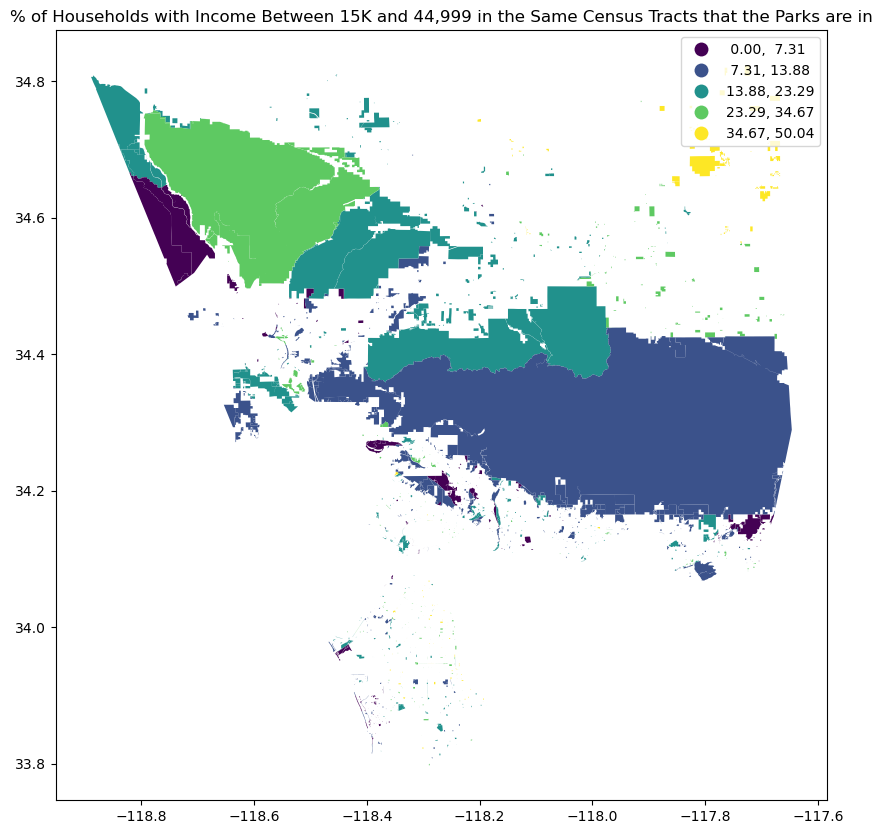

In [164]:
ax = parks_income.plot(figsize=(12,10),
                            column='HH_15K_To_44999_PCT',
                 legend=True, 
                 scheme='NaturalBreaks')
ax.set_title('% of Households with Income Between 15K and 44,999 in the Same Census Tracts that the Parks are in')

plt.savefig('Parks_HH_15K_To_44999_PCT.jpg') #some weird quirk where you have to save before you show the plot
plt.show()

Oops this plot was for both districts. Let's try again.

### District 2

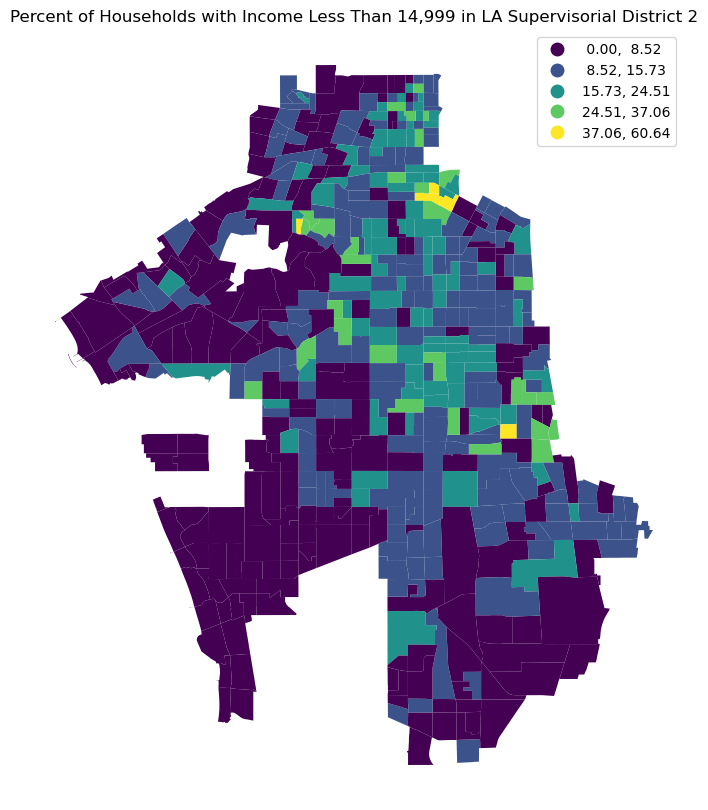

In [49]:
ax = tracts_income[tracts_income['DIST_SUP']==2].plot(figsize=(12,10),
                            column='HH_Less_Than_14999_PCT',
                 legend=True, 
                 scheme='NaturalBreaks')
ax.set_title('Percent of Households with Income Less Than 14,999 in LA Supervisorial District 2')
ax.axis('off') 
#to look into later - can we set a background color?

plt.savefig('D2_HH_Less_Than_14999_PCT.jpg') #some weird quirk where you have to save before you show the plot
plt.show()

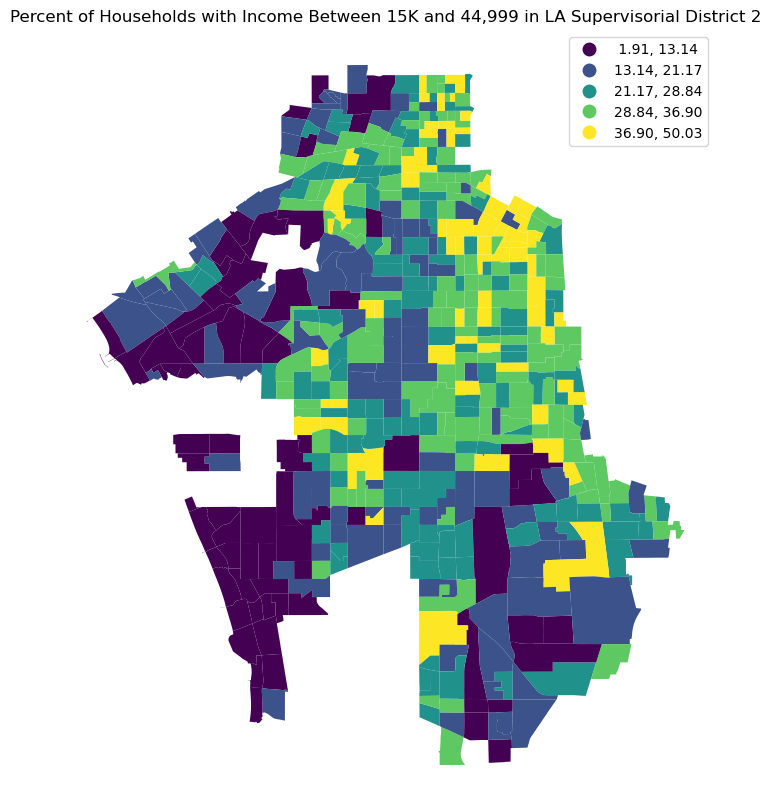

In [48]:
ax = tracts_income[tracts_income['DIST_SUP']==2].plot(figsize=(12,10),
                            column='HH_15K_To_44999_PCT',
                 legend=True, 
                 scheme='NaturalBreaks')
ax.set_title('Percent of Households with Income Between 15K and 44,999 in LA Supervisorial District 2')
ax.axis('off') 

#plt.savefig('D2_Parks_HH_15K_To_44999_PCT.jpg') #some weird quirk where you have to save before you show the plot
plt.show()

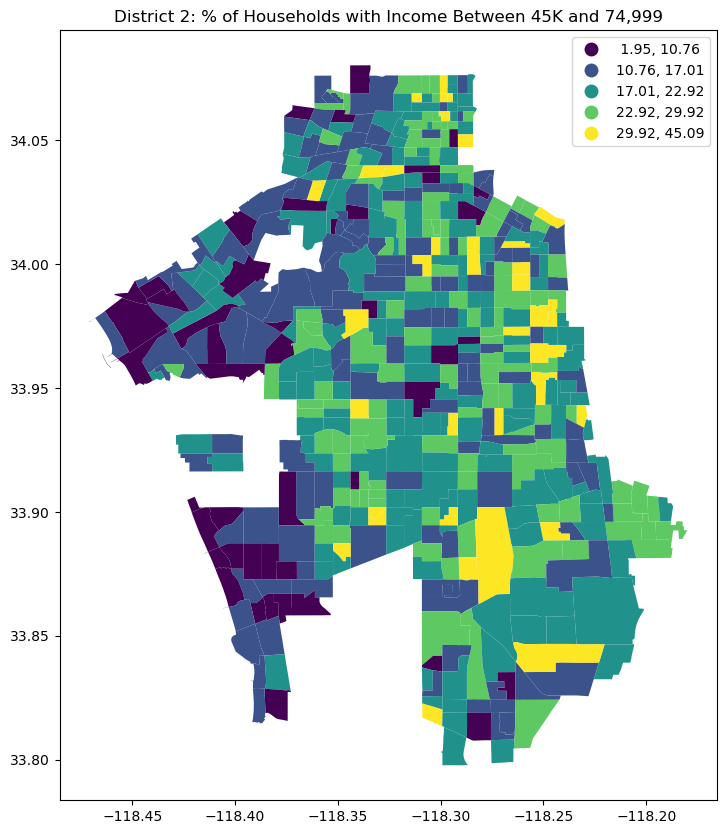

In [50]:
ax = tracts_income[tracts_income['DIST_SUP']==2].plot(figsize=(12,10),
                            column='HH_45K_To_74999_PCT',
                 legend=True, 
                 scheme='NaturalBreaks')
ax.set_title('District 2: % of Households with Income Between 45K and 74,999')

#plt.savefig('D2_Parks_HH_45K_To_74999_PCT.jpg') #some weird quirk where you have to save before you show the plot
plt.show()

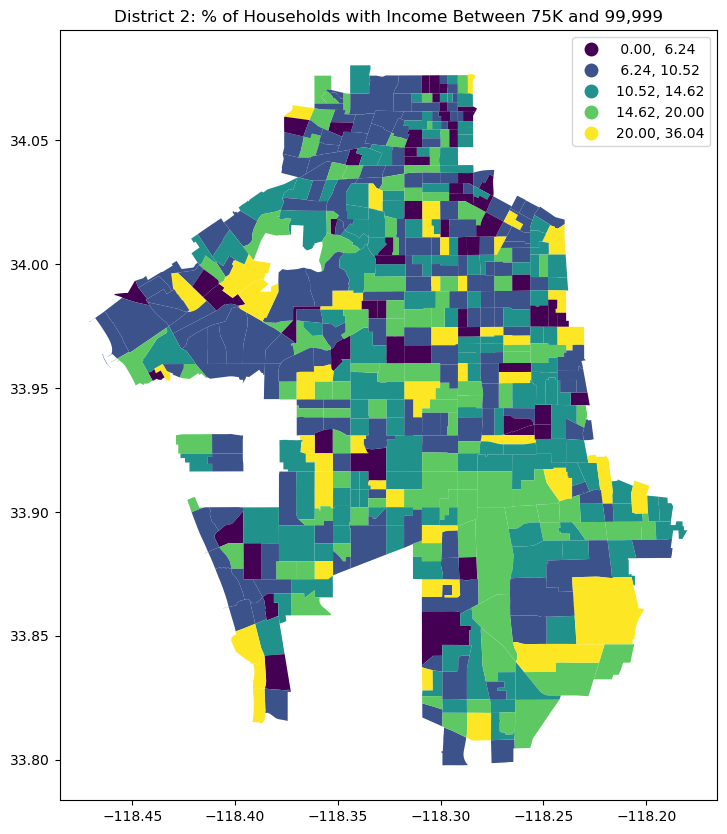

In [51]:
ax = tracts_income[tracts_income['DIST_SUP']==2].plot(figsize=(12,10),
                            column='HH_75K_To_99999_PCT',
                 legend=True, 
                 scheme='NaturalBreaks')
ax.set_title('District 2: % of Households with Income Between 75K and 99,999')

#plt.savefig('D2_Parks_HH_75K_To_99999_PCT.jpg') #some weird quirk where you have to save before you show the plot
plt.show()

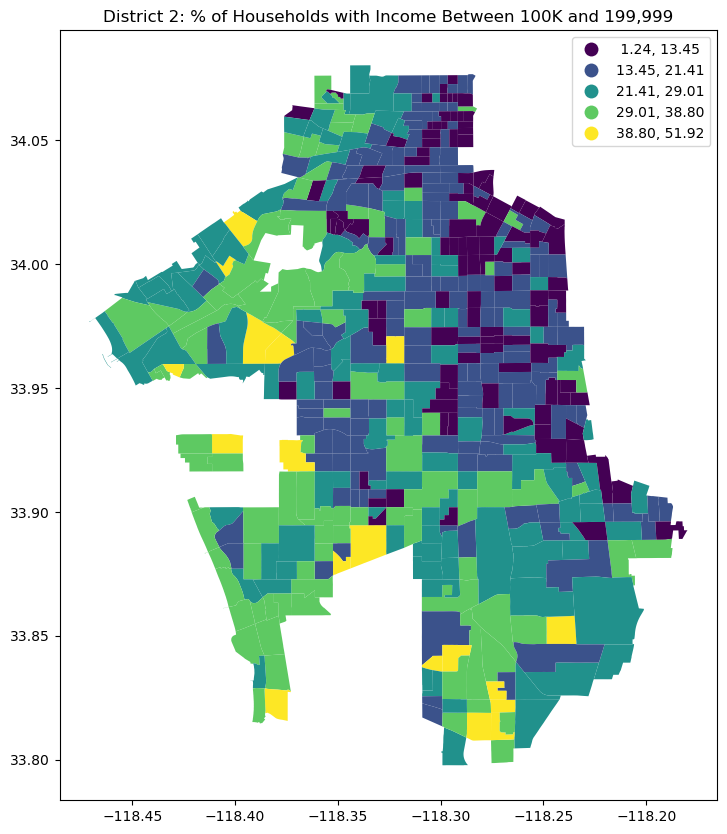

In [52]:
ax = tracts_income[tracts_income['DIST_SUP']==2].plot(figsize=(12,10),
                            column='HH_100K_To_199999_PCT',
                 legend=True, 
                 scheme='NaturalBreaks')
ax.set_title('District 2: % of Households with Income Between 100K and 199,999')

#plt.savefig('D2_Parks_HH_100K_To_199999_PCT.jpg') #some weird quirk where you have to save before you show the plot
plt.show()

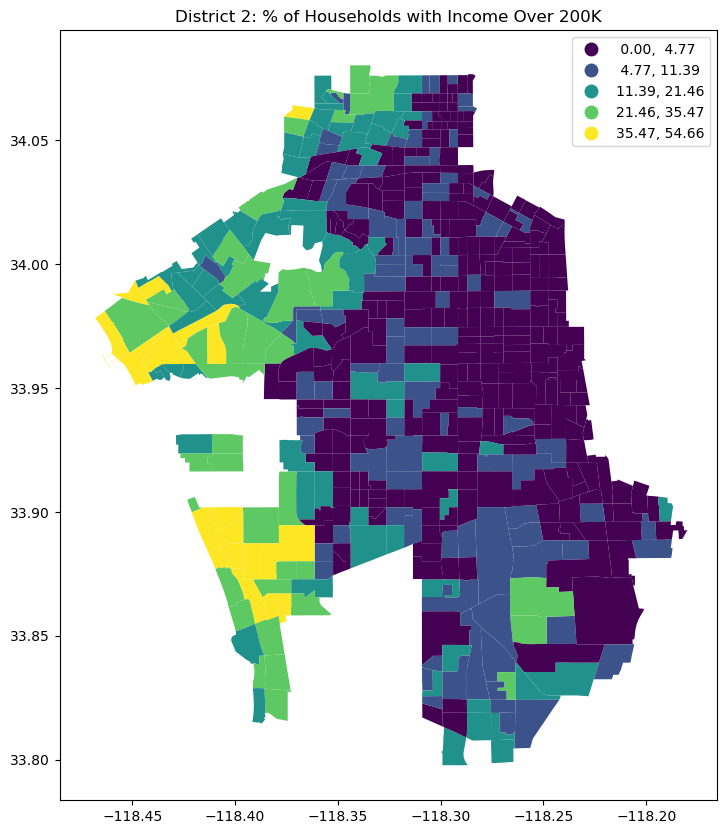

In [54]:
ax = tracts_income[tracts_income['DIST_SUP']==2].plot(figsize=(12,10),
                            column='HH_200K_Or_More_PCT',
                 legend=True, 
                 scheme='NaturalBreaks')
ax.set_title('District 2: % of Households with Income Over 200K')

#plt.savefig('D2_Parks_HH_200K_Or_More_PCT.jpg') #some weird quirk where you have to save before you show the plot
plt.show()

### District 5

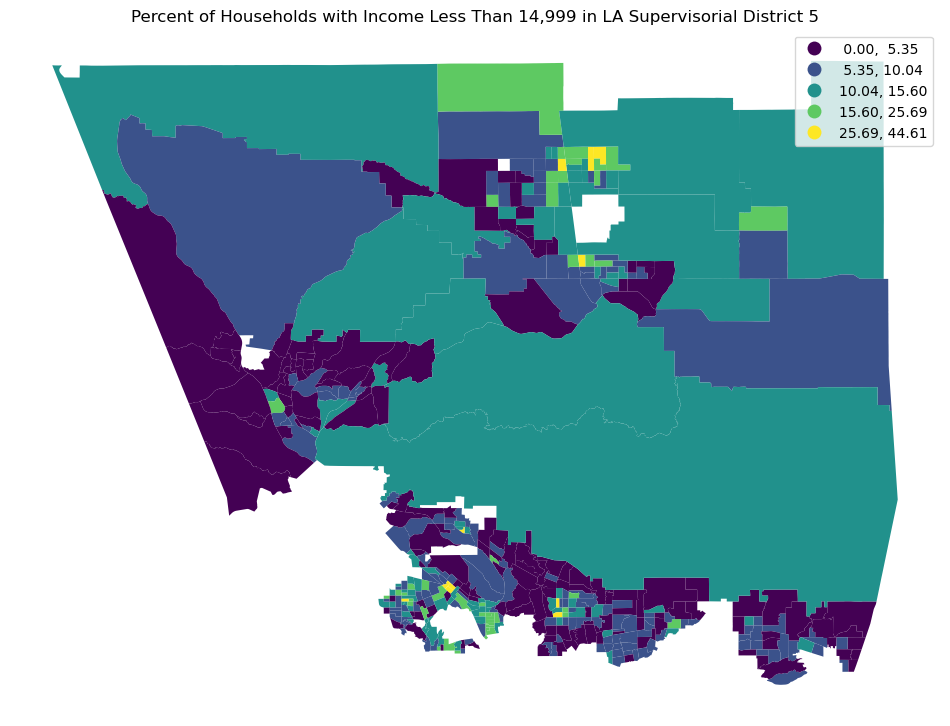

In [57]:
ax = tracts_income[tracts_income['DIST_SUP']==5].plot(figsize=(12,10),
                            column='HH_Less_Than_14999_PCT',
                 legend=True, 
                 scheme='NaturalBreaks')
ax.set_title('Percent of Households with Income Less Than 14,999 in LA Supervisorial District 5')
ax.axis('off')

plt.savefig('D5_HH_Less_Than_14999_PCT.jpg') #some weird quirk where you have to save before you show the plot
plt.show()

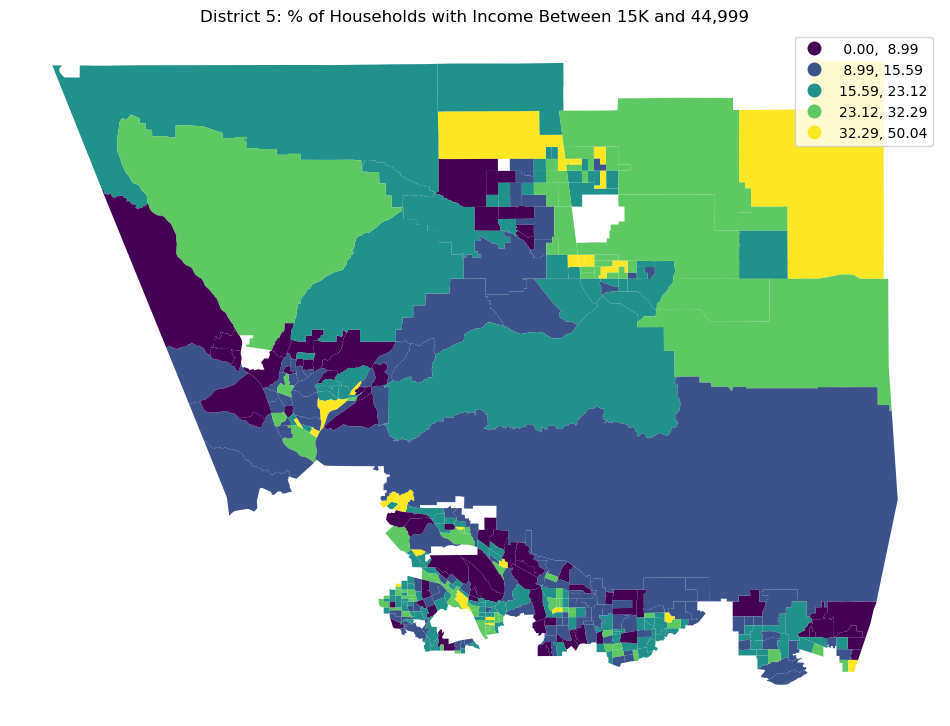

In [58]:
ax = tracts_income[tracts_income['DIST_SUP']==5].plot(figsize=(12,10),
                            column='HH_15K_To_44999_PCT',
                 legend=True, 
                 scheme='NaturalBreaks')
ax.set_title('District 5: % of Households with Income Between 15K and 44,999')
ax.axis('off')

#plt.savefig('D5_Parks_HH_15K_To_44999_PCT.jpg') #some weird quirk where you have to save before you show the plot
plt.show()

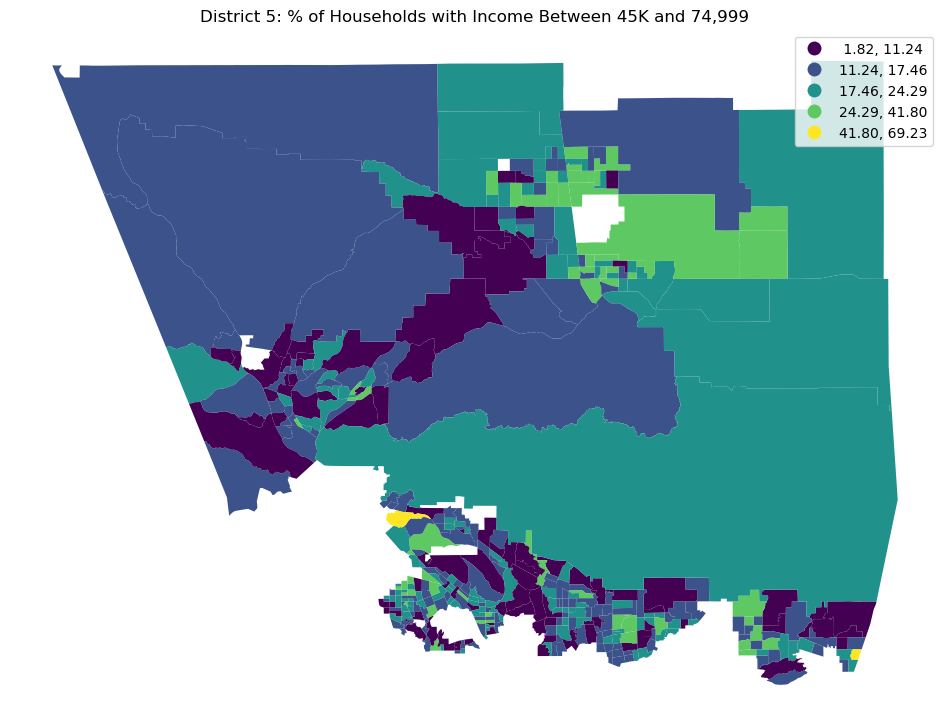

In [59]:
ax = tracts_income[tracts_income['DIST_SUP']==5].plot(figsize=(12,10),
                            column='HH_45K_To_74999_PCT',
                 legend=True, 
                 scheme='NaturalBreaks')
ax.set_title('District 5: % of Households with Income Between 45K and 74,999')
ax.axis('off')

#plt.savefig('D5_Parks_HH_45K_To_74999_PCT.jpg') #some weird quirk where you have to save before you show the plot
plt.show()

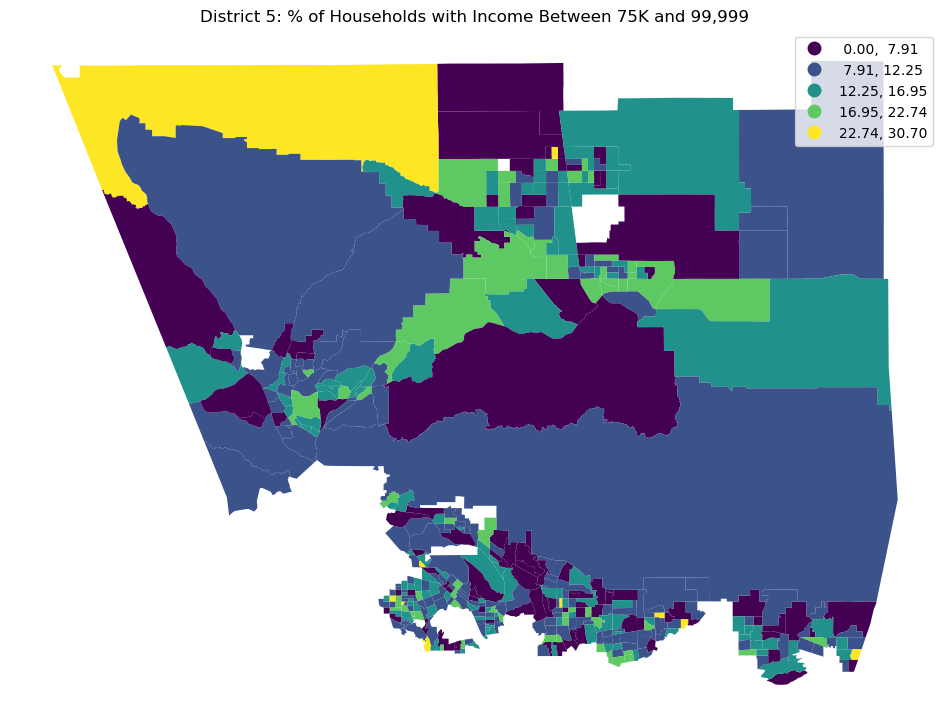

In [60]:
ax = tracts_income[tracts_income['DIST_SUP']==5].plot(figsize=(12,10),
                            column='HH_75K_To_99999_PCT',
                 legend=True, 
                 scheme='NaturalBreaks')
ax.set_title('District 5: % of Households with Income Between 75K and 99,999')
ax.axis('off')

#plt.savefig('D5_Parks_HH_75K_To_99999_PCT.jpg') #some weird quirk where you have to save before you show the plot
plt.show()

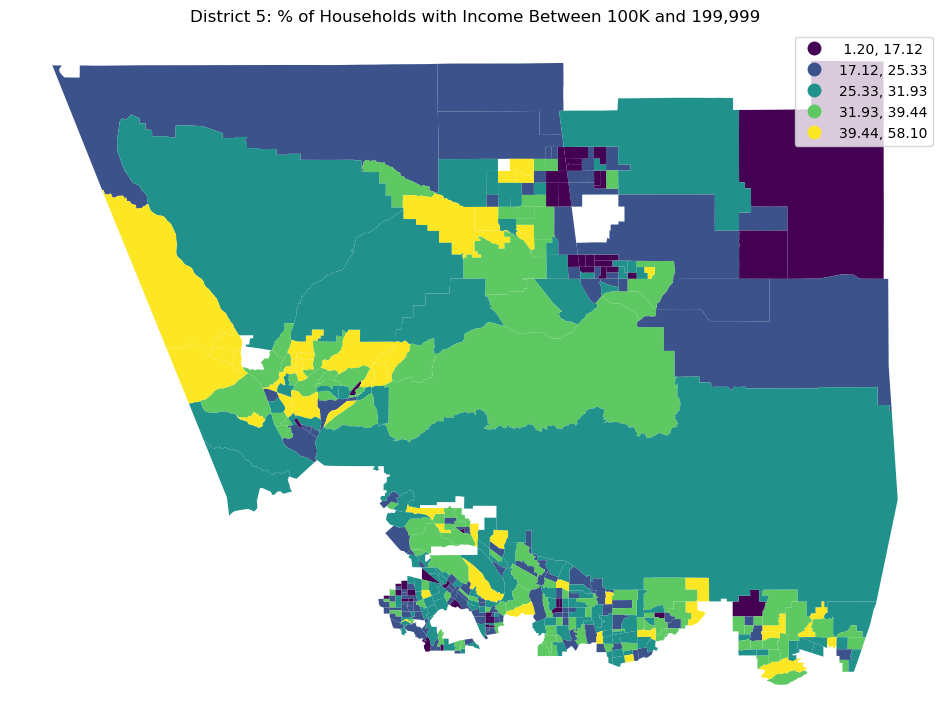

In [61]:
ax = tracts_income[tracts_income['DIST_SUP']==5].plot(figsize=(12,10),
                            column='HH_100K_To_199999_PCT',
                 legend=True, 
                 scheme='NaturalBreaks')
ax.set_title('District 5: % of Households with Income Between 100K and 199,999')
ax.axis('off')

#plt.savefig('D5_Parks_HH_100K_To_199999_PCT.jpg') #some weird quirk where you have to save before you show the plot
plt.show()

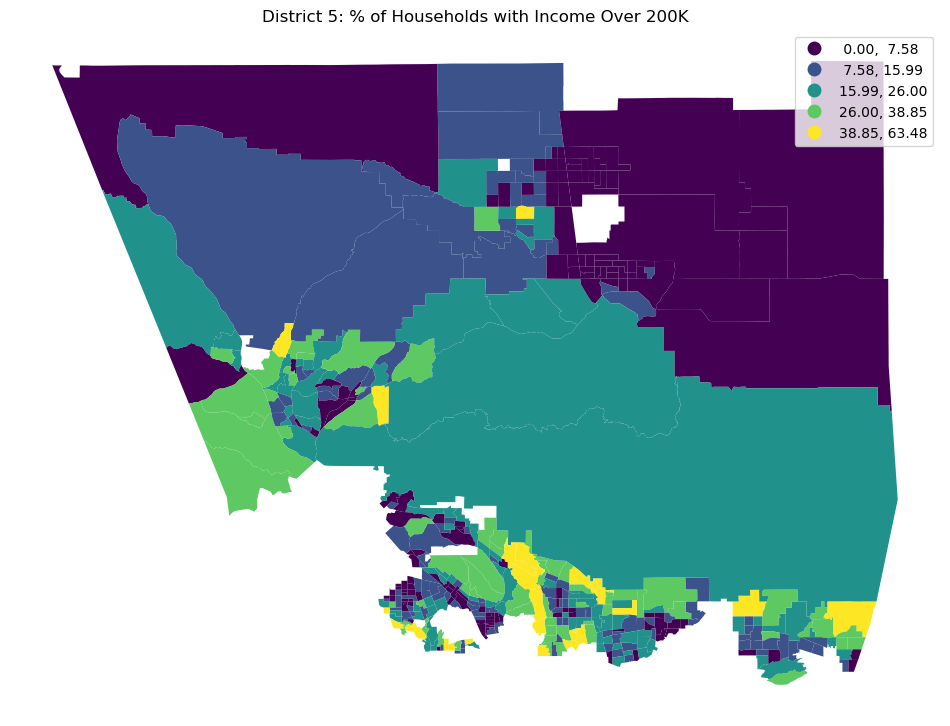

In [62]:
ax = tracts_income[tracts_income['DIST_SUP']==5].plot(figsize=(12,10),
                            column='HH_200K_Or_More_PCT',
                 legend=True, 
                 scheme='NaturalBreaks')
ax.set_title('District 5: % of Households with Income Over 200K')
ax.axis('off')

#plt.savefig('D5_Parks_HH_200K_Or_More_PCT.jpg') #some weird quirk where you have to save before you show the plot
plt.show()

## Plot of Income

I think these income groupings are in **[wide-form format](https://plotly.com/python/wide-form/)**, so I have to finagle a bit for the colors to work on the legend.

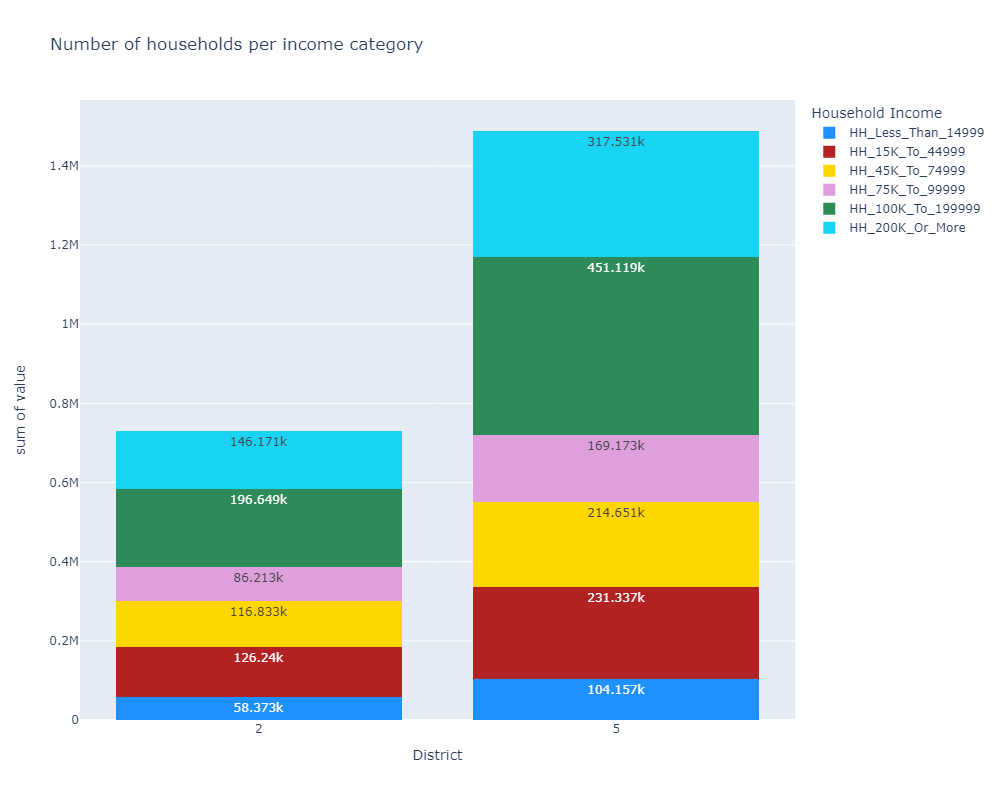

In [48]:
#cannot do percents because it won't stack to 100 - use HH counts columns instead
#consider horizontal bars
#how to make the bars one solid color -- use px.histogram instead of px.bar

parks_income['DIST_SUP'] = parks_income['DIST_SUP'].astype(str)

fig = px.histogram(parks_income,
                   x = 'DIST_SUP',
                   y=[ 'HH_Less_Than_14999',  
                'HH_15K_To_44999',      
                'HH_45K_To_74999',      
                'HH_75K_To_99999',      
                'HH_100K_To_199999',   
                'HH_200K_Or_More'], #color='DIST_SUP',
                   labels={'DIST_SUP': 'District'}, #rename the variables for display
                   color_discrete_sequence=["dodgerblue", "firebrick", "gold", "plum", "seagreen", "forest green"], #change colors
                   text_auto = True, #label each portion of the stack
                   title = 'Number of households per income category')

#fig.update_layout(barmode='group') #don't stack d2 and d5

fig.update_layout(legend_title_text='Household Income') #update the legend title

#this doesn't work for me :(
#update the display name of the variables in the legend
#new = {         'HH_Less_Than_14999': 'Less than $14,999',  
#                'HH_15K_To_44999': '$15K to $44,999',      
#                'HH_45K_To_74999': '$45K to $74,999',      
#                'HH_75K_To_99999': '$75K to $99,999',      
#                'HH_100K_To_199999': '$100K to $199,999',   
#                'HH_200K_Or_More': '$200K or more'}
#fig.for_each_trace(lambda t: t.update(name = new[t.name]))

fig.update_layout(barmode='stack', xaxis={'categoryorder':'category ascending'}) #a hack to make district 2 appear first

fig.update_layout(
    autosize=False,
    height=800,
) #to un-squish the chart per the internet

fig.show()

## End of Income Maps / Graphs